<a href="https://colab.research.google.com/github/nhinguyen-lab/dataproject/blob/main/E_commerce_customer_Segmentation_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1. import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Loreal - DA test/e-commerce_data.csv', encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Key Findings

1. Top country generate the most sale revenue : United Kingdom, Netherlands & Ireland
2. Top 5 products with the most sale revenue : paper craft little birdie, cakestand, tealight holder, jumbo bag & ceremic jar
3. Sale revenue and Quantity has a positive correlation , hence increasing quantity can increase sales revenue
4. November has the highest number of order , this can imply people usually shop the most during holiday season
5. There is no transaction on Saturday in this dataset, people tend to shop in the begining of the week until Thursday
6. The golden hour is from 12pm - 3pm throughout the day as the amount of orders peak during these hours
7. Using RFM model to segment customer for better business decision , the business can know who is the most critical customers of the dataset
8. Build product recommend system to recommend similiar products to users



## Handle Missing values and Duplicated values

In [ ]:
#1. missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#calculate percentage of NaN rows comparing to orginal dataset
print(df['Description'].isnull().sum()/df.shape[0]*100)
print(df['CustomerID'].isnull().sum()/df.shape[0]*100)

0.2683107311375157
24.926694334288598


In [ ]:
#display some NAN values for description
df[df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom


In [ ]:
#display some NAN values for customerID
df[df['CustomerID'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


* With the missing values
There is roughly 25% of the data is not assigned to any customer and the Nan values for description relatively has no customerID and 0 unit price -> proceed to drop NaN values



In [ ]:
#drop NaN values
df = df.dropna()

In [ ]:
#drop duplicate
df = df.drop_duplicates()

## Handle datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [ ]:
#change InvoiceDate to datetime
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

#change CustomerID to int64

df['CustomerID']=df['CustomerID'].astype('int64')

In [ ]:
#re-check on the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


## Handle String - Description

In [ ]:
#remove stopwords, remove punctuations
import nltk
import string
from nltk.corpus import stopwords
import warnings


nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#remove stopwords
def remove_stopwords(text):
  stop_words = stopwords.words('english')

  imp_words = []

  # Storing the important words
  for word in str(text).split():
    word = word.lower()

    if word not in stop_words:
      imp_words.append(word)

  output = " ".join(imp_words)

  return output

In [ ]:
df['Description'] = df['Description'].apply(lambda text: remove_stopwords(text))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
#remove punctuation
punctuations_list = string.punctuation


def cleaning_punctuations(text):
    signal = str.maketrans('', '', punctuations_list)
    return text.translate(signal)

In [ ]:
df['Description'] = df['Description'].apply(lambda x : cleaning_punctuations(x))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## Handle Cancel orders and Stock values

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
#add in classification if the order is Cancelled or Not Cancelled : 0 - No Cancel / 1 - Yes Cancel
df['OrderCancel'] = df['InvoiceNo'].apply(lambda x:int('C' in x))

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0


In [ ]:
#stockcode with special character
df[df['StockCode'].str.contains('^[a-zA-z]+')][['StockCode']].value_counts()

StockCode   
POST            1196
M                460
C2               134
D                 77
CRUK              16
DOT               16
BANK CHARGES      12
PADS               4
dtype: int64

POST            -> POSTAGE
D               -> Discount
C2              -> CARRIAGE
M               -> Manual
BANK CHARGES    -> Bank Charges
PADS            -> PADS TO MATCH ALL CUSHIONS
DOT             -> DOTCOM POSTAGE

In [ ]:
df[df["StockCode"] == 'POST']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel
45,536370,POST,postage,3,2010-12-01 08:45:00,18.0,12583,France,0
386,536403,POST,postage,1,2010-12-01 11:27:00,15.0,12791,Netherlands,0
1123,536527,POST,postage,1,2010-12-01 13:04:00,18.0,12662,Germany,0
5073,536840,POST,postage,1,2010-12-02 18:27:00,18.0,12738,Germany,0
5258,536852,POST,postage,1,2010-12-03 09:51:00,18.0,12686,France,0
...,...,...,...,...,...,...,...,...,...
541198,581493,POST,postage,1,2011-12-09 10:10:00,15.0,12423,Belgium,0
541216,581494,POST,postage,2,2011-12-09 10:13:00,18.0,12518,Germany,0
541730,581570,POST,postage,1,2011-12-09 11:59:00,18.0,12662,Germany,0
541767,581574,POST,postage,2,2011-12-09 12:09:00,18.0,12526,Germany,0


In [ ]:
#remove StockCode with special character- assuming we analyze on standardize StockCode
df_clean = df[~df['StockCode'].str.contains('^[a-zA-z]+')]

In [ ]:
df_clean.describe() #Quantity has some negtive values

,Quantity,UnitPrice,CustomerID,OrderCancel
count,399689.000000,399689.000000,399689.000000,399689.000000
mean,12.229383,2.907457,15288.696411,0.021282
std,250.836859,4.451881,1710.810771,0.144321
min,-80995.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13959.000000,0.000000
50%,5.000000,1.950000,15152.000000,0.000000
75%,12.000000,3.750000,16791.000000,0.000000
max,80995.000000,649.500000,18287.000000,1.000000


In [ ]:
#remove Cancelled orders & remove Quantity due to Cancelled order
df_clean = df_clean[(df_clean["OrderCancel"] == 0) & (df_clean["Quantity"] >0)]

In [ ]:
import re
letter_lst =[]
for s in df_clean["StockCode"]:
  res = re.split('(\d+)', s)
  letter_lst.append(res[-1])
print(letter_lst)

['A', '', 'B', 'G', 'E', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'A', '', 'B', '', '', '', '', '', '', '', '', 'L', 'G', 'E', '', '', '', 'A', '', 'B', '', '', '', '', '', '', '', '', 'L', 'G', 'E', '', '', '', '', '', '', '', 'C', '', '', 'B', 'C', '', '', '', '', '', '', '', '', 'A', 'B', 'B', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'A', 'C', '', '', 'S', '', '', '', '', '', '', '', 'BL', 'N', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'A', '', '', '', 'C', 'B', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'C', 'G', 'B', 'A', '', '', '', '', '', '', '', '', '', '', '', '', '', 'S', '', '', 'A', '', '', '', '', '', '', '', '', '', 'G', 'E', '', '', 'B', '', '', '', '', '', '', '', '', '

In [ ]:
#classify if the StockCode has character or not
df_clean["StockCode_Split"] = letter_lst
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel,StockCode_Split
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,A
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,B
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,G
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,E


## Country and Product with Highest Sales Revenue

In [ ]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel,StockCode_Split
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,A
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,B
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,G
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,E


In [ ]:
#overview
print(f"number of products : {df_clean['StockCode'].nunique()}")
print(f"number of transactions : {df_clean['InvoiceNo'].nunique()}")
print(f"number of customers : {df_clean['CustomerID'].nunique()}")
print(f"number of country : {df_clean['Country'].nunique()}")

number of products : 3659
number of transactions : 18405
number of customers : 4335
number of country : 37


In [ ]:
#sale revenue per country - add in total price = unit.price * quantity
df_clean['SaleRevenue']= df_clean['Quantity'] * df_clean['UnitPrice']
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel,StockCode_Split,SaleRevenue
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,A,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,B,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,G,20.34
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,E,20.34


In [ ]:
#country generate the most sales

df_country_sale = df_clean.groupby("Country")["SaleRevenue"].sum().reset_index().sort_values(by = "SaleRevenue", ascending = False).head(10)
df_country_sale

,Country,SaleRevenue
35,United Kingdom,7242855.32
23,Netherlands,283889.34
10,EIRE,257013.12
14,Germany,205381.15
13,France,183801.94
0,Australia,138103.81
30,Spain,55706.56
32,Switzerland,52441.95
19,Japan,37416.37
3,Belgium,36927.34


In [ ]:
def addlabels(y):
    for i in range(len(df_country_sale['SaleRevenue'].values)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

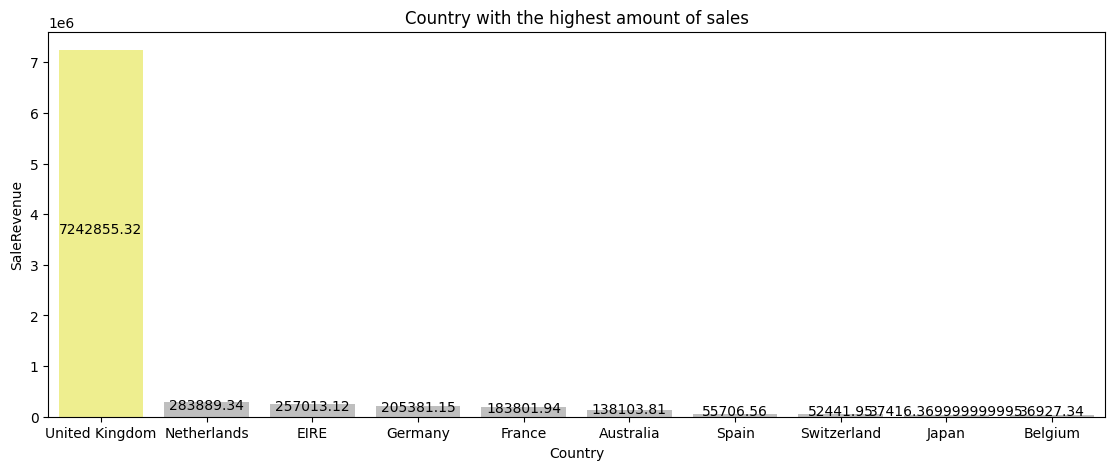

In [ ]:
#visualization
plt.figure(figsize=(30,5))
plt.subplot(121)
plt.title('Country with the highest amount of sales')

cols = ['grey' if (x < max(df_country_sale['SaleRevenue'].values.tolist())) else 'yellow' for x in df_country_sale['SaleRevenue'].values.tolist()]
sns.barplot(
    data = df_country_sale,
    x = 'Country',
    y = 'SaleRevenue',
    palette = cols,
    alpha = 0.5
 )

addlabels(df_country_sale['SaleRevenue'].values.tolist())
plt.show()

In [ ]:
# product generate the most sale

df_product = df_clean.groupby("Description")["SaleRevenue"].sum().reset_index().sort_values(by = "SaleRevenue", ascending = False).head(5)
df_product

,Description,SaleRevenue
2293,paper craft little birdie,168469.60
2739,regency cakestand 3 tier,142264.75
3666,white hanging heart tlight holder,100392.10
1735,jumbo bag red retrospot,85040.54
1970,medium ceramic top storage jar,81416.73


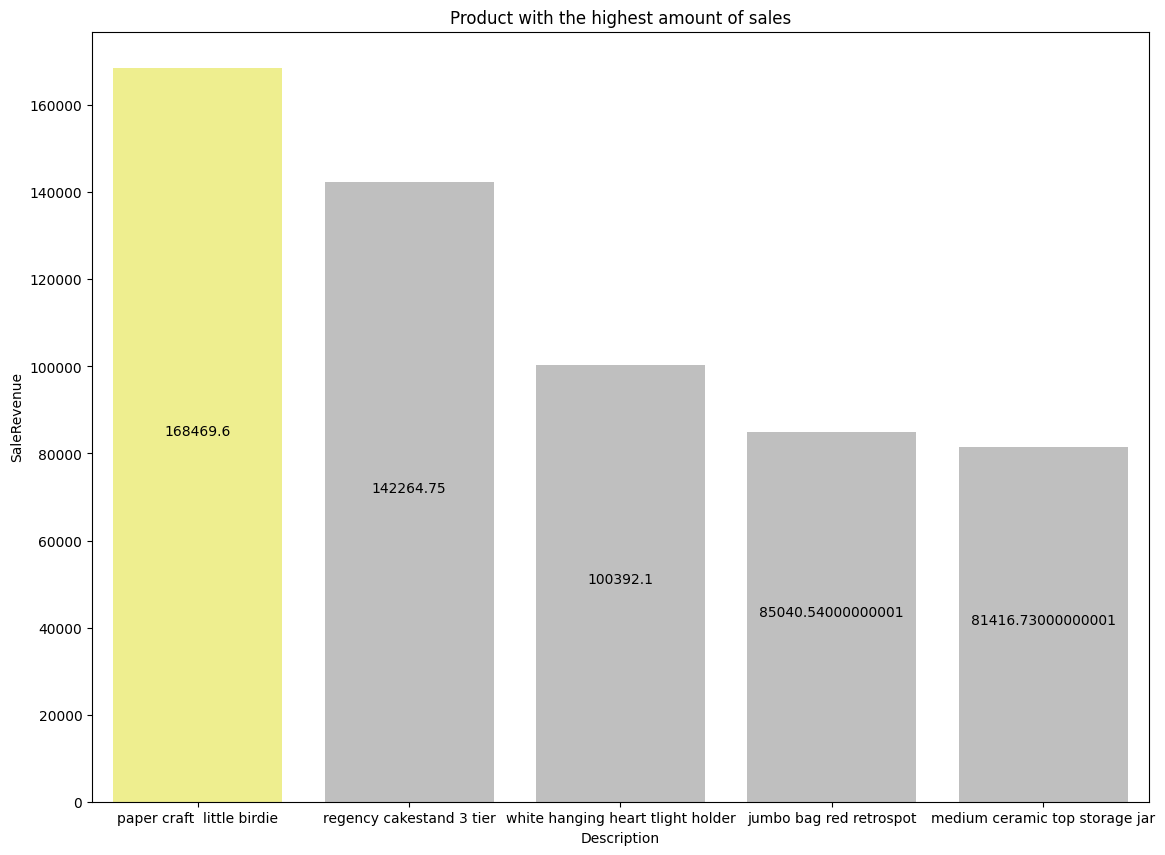

In [ ]:
#visualization
plt.figure(figsize=(30,10))
plt.subplot(121)
plt.title('Product with the highest amount of sales')

cols = ['grey' if (x < max(df_product['SaleRevenue'].values.tolist())) else 'yellow' for x in df_product['SaleRevenue'].values.tolist()]
sns.barplot(
    data = df_product,
    x = 'Description',
    y = 'SaleRevenue',
    palette = cols,
    alpha = 0.5
 )

for i in range(len(df_product['SaleRevenue'].values)):
        plt.text(i, df_product['SaleRevenue'].values.tolist()[i]//2, df_product['SaleRevenue'].values.tolist()[i], ha = 'center')

plt.show()

## Pattern of Order

In [ ]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel,StockCode_Split,SaleRevenue
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,A,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,B,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,G,20.34
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,E,20.34


In [ ]:
#add in Month, Year and Date of the week
df_clean["Month"]=df_clean["InvoiceDate"].dt.month
df_clean["Year"]=df_clean["InvoiceDate"].dt.year
df_clean["date_week"]=df_clean["InvoiceDate"].dt.weekday
#Mon :0 , Sunday:6

df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel,StockCode_Split,SaleRevenue,Month,Year,date_week
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,A,15.30,12,2010,2
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,,20.34,12,2010,2
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,B,22.00,12,2010,2
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,G,20.34,12,2010,2
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,E,20.34,12,2010,2


In [ ]:
#overview

df_clean.groupby("Year")["InvoiceNo"].nunique()

Year
2010     1394
2011    17011
Name: InvoiceNo, dtype: int64

In [ ]:
#Number of order by Month - November has the most order
order_by_month =df_clean.groupby("Month")["InvoiceNo"].nunique().reset_index()
order_by_month

,Month,InvoiceNo
0,1,983
1,2,993
2,3,1312
3,4,1139
4,5,1544
5,6,1390
6,7,1321
7,8,1268
8,9,1739
9,10,1903


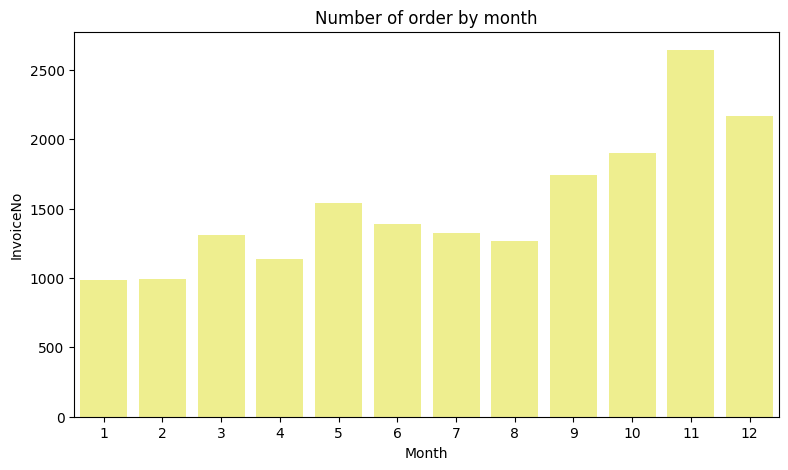

In [ ]:
#visualization
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.title('Number of order by month')

sns.barplot(
    data = order_by_month,
    x = 'Month',
    y = "InvoiceNo",
    color = 'Yellow',
    alpha = 0.5)

plt.show()


In [ ]:
#Number of order by date within a week - There is no transaction on Saturday
df_clean.groupby("date_week")["InvoiceNo"].nunique().reset_index()

,date_week,InvoiceNo
0,0,2830
1,1,3156
2,2,3436
3,3,4004
4,4,2811
5,6,2168


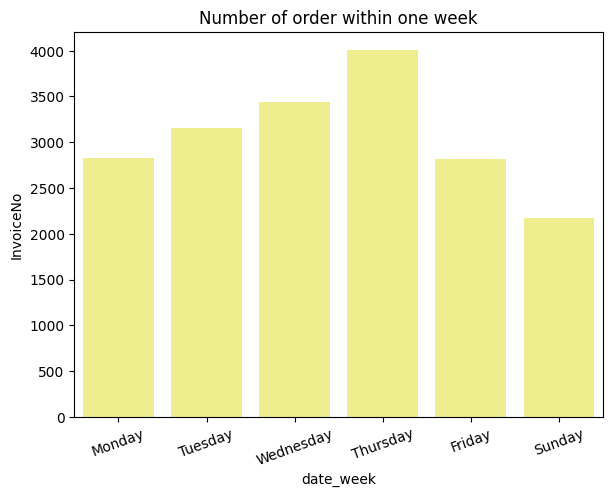

In [ ]:
#visualization
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('Number of order within one week')

sns.barplot(
    data = df_clean.groupby("date_week")["InvoiceNo"].nunique().reset_index(),
    x = 'date_week',
    y = "InvoiceNo",
    color = 'Yellow',
    alpha = 0.5)
plt.xticks([0,1,2,3,4,5], ['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday'], rotation = 20)
plt.show()


In [ ]:
#add in hour of the day
df_clean["day_hour"]=df_clean["InvoiceDate"].dt.hour

In [ ]:
#Number of order throughout a day, peak around 12 - 15
df_clean.groupby("day_hour")["InvoiceNo"].nunique().reset_index()

,day_hour,InvoiceNo
0,6,1
1,7,29
2,8,554
3,9,1383
4,10,2204
5,11,2262
6,12,3118
7,13,2624
8,14,2252
9,15,2022


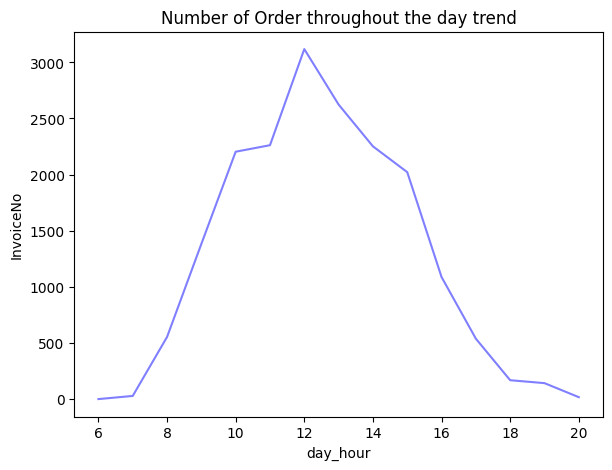

In [ ]:
#visualization
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('Number of Order throughout the day trend')

sns.lineplot(
    data = df_clean.groupby("day_hour")["InvoiceNo"].nunique().reset_index(),
    x = 'day_hour',
    y = "InvoiceNo",
    color = 'Blue',
    alpha = 0.5)

plt.show()


## Sale Revenue Trend

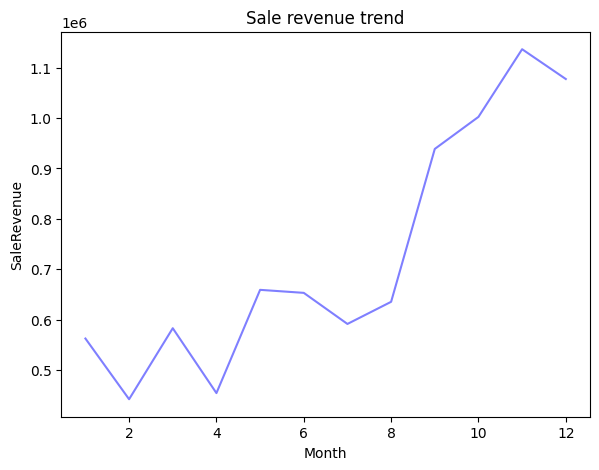

In [ ]:
#visualization
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('Sale revenue trend')

sns.lineplot(
    data = df_clean.groupby('Month')["SaleRevenue"].sum().reset_index(),
    x = 'Month',
    y = "SaleRevenue",
    color = 'Blue',
    alpha = 0.5)

plt.show()


## Correlation

<Axes: >

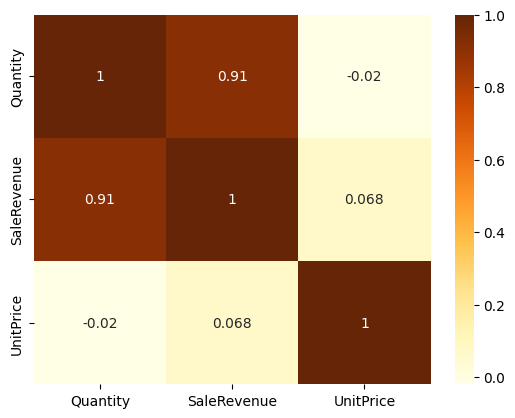

In [ ]:
sns.heatmap(df_clean[["Quantity","SaleRevenue","UnitPrice"]].corr(), cmap="YlOrBr", annot=True) # Sales are most correlated with Quantity of the item

## Customer Segmentation

In [ ]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,391183.0,13.179665,181.907403,1.0,2.00,6.00,12.00,80995.0
UnitPrice,391183.0,2.874130,4.284639,0.0,1.25,1.95,3.75,649.5
CustomerID,391183.0,15295.083503,1710.359579,12346.0,13969.00,15158.00,16794.00,18287.0
OrderCancel,391183.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.0
SaleRevenue,391183.0,22.335397,310.919394,0.0,4.95,11.90,19.80,168469.6
Month,391183.0,7.602483,3.414904,1.0,5.00,8.00,11.00,12.0
Year,391183.0,2010.934629,0.247180,2010.0,2011.00,2011.00,2011.00,2011.0
date_week,391183.0,2.607710,1.924592,0.0,1.00,2.00,4.00,6.0
day_hour,391183.0,12.723066,2.276018,6.0,11.00,13.00,14.00,20.0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391150 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    391150 non-null  object        
 1   StockCode    391150 non-null  object        
 2   Description  391150 non-null  object        
 3   Quantity     391150 non-null  int64         
 4   InvoiceDate  391150 non-null  datetime64[ns]
 5   UnitPrice    391150 non-null  float64       
 6   CustomerID   391150 non-null  int64         
 7   Country      391150 non-null  object        
 8   SaleRevenue  391150 non-null  float64       
 9   OrderCancel  391150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 32.8+ MB


In [ ]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel,StockCode_Split,SaleRevenue,Month,Year,date_week,day_hour
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,A,15.30,12,2010,2,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,,20.34,12,2010,2,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,B,22.00,12,2010,2,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,G,20.34,12,2010,2,8
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,E,20.34,12,2010,2,8


In [ ]:
# find the last day in the dataset

last_day = df_clean['InvoiceDate'].max()
print(last_day)

#assuming the analysis is one day after the dataset last day (last_day +1 )

from datetime import timedelta
today_date = last_day + timedelta(days = 1)
print(today_date)

2011-12-09 12:50:00
2011-12-10 12:50:00


In [ ]:
# to analyze FMR :
# recency : last order day of customer
# frequency : total no. of invoice of customer
# monetary : total price that spent by customer

In [ ]:
#aggregate data
df_rfm = df_clean.groupby("CustomerID").agg({ "InvoiceDate": lambda date :(today_date - date.max()).days, "InvoiceNo": lambda num : num.nunique(), "SaleRevenue": "sum", "Description":"sum" }).reset_index()
df_rfm.head()

,CustomerID,InvoiceDate,InvoiceNo,SaleRevenue,Description
0,12346,326,1,77183.60,medium ceramic top storage jar
1,12347,2,7,4310.00,black candelabra tlight holderairline bag vint...
2,12348,75,4,1437.24,72 sweetheart fairy cake cases60 cake cases do...
3,12349,19,1,1457.55,parisienne curio cabinetsweetheart wall tidypi...
4,12350,310,1,294.40,chocolate way metal signmetal sign neighbourho...


In [ ]:
#rename columns
df_rfm = df_rfm.rename(columns = {"InvoiceDate":"Recency" ,  "InvoiceNo" :"Frequency" , "SaleRevenue" :"Monetary"})

In [ ]:
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,Description
0,12346,326,1,77183.60,medium ceramic top storage jar
1,12347,2,7,4310.00,black candelabra tlight holderairline bag vint...
2,12348,75,4,1437.24,72 sweetheart fairy cake cases60 cake cases do...
3,12349,19,1,1457.55,parisienne curio cabinetsweetheart wall tidypi...
4,12350,310,1,294.40,chocolate way metal signmetal sign neighbourho...


In [ ]:
# calculate RMF Score

#prepare segmentation : Recency
df_rfm["Recency_Score"]=pd.qcut(df_rfm['Recency'], 5 , labels = [5,4,3,2,1] , duplicates = 'drop') # 5 : scale new - 1 : old x-axis

In [ ]:
#prepare segmentation : Frequency

df_rfm["Frequency_Score"] = pd.qcut(df_rfm['Frequency'].rank(method="first") , 5 , labels = [1,2,3,4,5]) # 5 : scale old - 5 : new y-axis

In [ ]:
#prepare segmentation : Monetary

df_rfm["Monetary_Score"] = pd.qcut(df_rfm["Monetary"] , 5, labels = [1,2,3,4,5], duplicates = "drop") #5 : spend most - 1 : spend less

In [ ]:
#calculate RFM score : RMF score = Recency score concat Frequency score (x & y axis )

df_rfm['RFM_Score'] = (df_rfm["Recency_Score"].astype(str) + df_rfm["Frequency_Score"].astype(str))
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,Description,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,12346,326,1,77183.60,medium ceramic top storage jar,1,1,5,11
1,12347,2,7,4310.00,black candelabra tlight holderairline bag vint...,5,5,5,55
2,12348,75,4,1437.24,72 sweetheart fairy cake cases60 cake cases do...,2,4,4,24
3,12349,19,1,1457.55,parisienne curio cabinetsweetheart wall tidypi...,4,1,4,41
4,12350,310,1,294.40,chocolate way metal signmetal sign neighbourho...,1,1,2,11


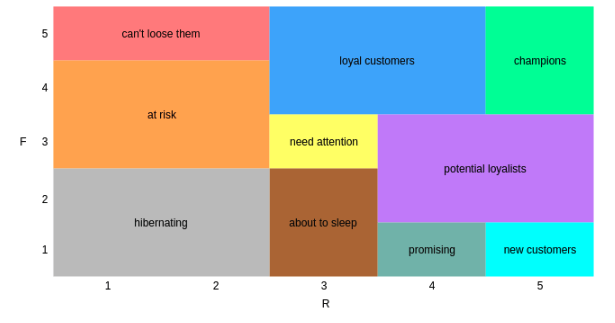

In [ ]:
#create segmentation

segment_map = { r'[1-2][1-2]':'Hibernating',
               r'[1-2][3-4]' :'At_Risk',
               r'[1-2][5]':'Cant_Lose',
               r'[3][1-2]' :'About_To_Sleep',
               r'[3][3]':'Need_Attention',
               r'[3-4][4-5]':'Loyal_Customer',
               r'[4][1]' : 'Promising',
               r'[4-5][2-3]': 'Potential_Loyal',
               r'[5][4-5]' : 'Champion',
               r'[5][1]' : 'New_Customer'}

In [ ]:
#assign segmentation

df_rfm['Customer_Segment']=df_rfm["RFM_Score"].replace(segment_map, regex=True)
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,Description,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Customer_Segment
0,12346,326,1,77183.60,medium ceramic top storage jar,1,1,5,11,Hibernating
1,12347,2,7,4310.00,black candelabra tlight holderairline bag vint...,5,5,5,55,Champion
2,12348,75,4,1437.24,72 sweetheart fairy cake cases60 cake cases do...,2,4,4,24,At_Risk
3,12349,19,1,1457.55,parisienne curio cabinetsweetheart wall tidypi...,4,1,4,41,Promising
4,12350,310,1,294.40,chocolate way metal signmetal sign neighbourho...,1,1,2,11,Hibernating


In [ ]:
for segment in df_rfm['Customer_Segment'].unique():
  print(segment)

Hibernating
Champion
At_Risk
Promising
Loyal_Customer
Potential_Loyal
Need_Attention
New_Customer
About_To_Sleep
Cant_Lose


In [ ]:
#overview :
for segment in df_rfm['Customer_Segment'].unique():
  value = df_rfm[(df_rfm['Customer_Segment'] == segment)].shape
  print(f" Total {segment} value is {value[0]}")

 Total Hibernating value is 1067
 Total Champion value is 643
 Total At_Risk value is 575
 Total Promising value is 97
 Total Loyal_Customer value is 818
 Total Potential_Loyal value is 493
 Total Need_Attention value is 188
 Total New_Customer value is 44
 Total About_To_Sleep value is 347
 Total Cant_Lose value is 63


In [ ]:
#download file for tableau
from google.colab import files
df_rfm.to_csv('RFM_table.csv')
files.download('RFM_table.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
df_clean.to_csv('clean_table.csv')
files.download('clean_table.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Best customers : RFM Score = 55
df_rfm[df_rfm["RFM_Score"] == '55'].head(5)


,CustomerID,Recency,Frequency,Monetary,Description,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Customer_Segment
1,12347,2,7,4310.00,black candelabra tlight holderairline bag vint...,5,5,5,55,Champion
15,12362,3,10,4737.23,vintage seaside jigsaw puzzleswatering blue el...,5,5,5,55,Champion
56,12417,3,9,3226.10,antique glass pedestal bowlvintage cream cat f...,5,5,5,55,Champion
61,12423,1,8,1634.31,doormat red retrospotpaperweight childhood mem...,5,5,4,55,Champion
71,12433,1,7,13375.87,box 24 cocktail parasolsgrow plantchildrens ap...,5,5,5,55,Champion


In [ ]:
# Churn customer : RMF 11 or 12
df_rfm[(df_rfm["RFM_Score"] == '11') | (df_rfm["RFM_Score"] == '12')].head(5)

,CustomerID,Recency,Frequency,Monetary,Description,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Customer_Segment
0,12346,326,1,77183.6,medium ceramic top storage jar,1,1,5,11,Hibernating
4,12350,310,1,294.4,chocolate way metal signmetal sign neighbourho...,1,1,2,11,Hibernating
6,12353,204,1,89.0,ceramic cake stand hanging cakesmini cake sta...,1,1,1,11,Hibernating
7,12354,232,1,1079.4,jumbo bag alphabetcharlotte bag apples designc...,1,1,4,11,Hibernating
8,12355,214,1,459.4,grow flytrap sunflower tinice cream sundae lip...,1,1,2,11,Hibernating


## Product Recommendation

In [ ]:
df_rec = df_clean.drop_duplicates(subset = 'Description')
df_rec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCancel,StockCode_Split,SaleRevenue,Month,Year,date_week,day_hour
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,A,15.30,12,2010,2,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,,20.34,12,2010,2,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,B,22.00,12,2010,2,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,G,20.34,12,2010,2,8
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,E,20.34,12,2010,2,8


In [ ]:
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%capture
vectorizer = TfidfVectorizer(analyzer = 'word')
vectorizer.fit(df_rec['Description'])

In [ ]:
def get_similarities(description, data=df_rec):

    # Get vector for the input content
    talk_array1 = vectorizer.transform(description).toarray()

    # Store similarity for each row of the dataset
    sim = []
    pea = []
    for idx, row in data.iterrows():
        details = row['Description']

        # Get vector for current product
        talk_array2 = vectorizer.transform(
            df_rec[df_rec['Description'] == details]['Description']).toarray()

        # Calculate cosine similarities
        cos_sim = cosine_similarity(talk_array1, talk_array2)[0][0]

        # Calculate pearson correlation
        pea_sim = pearsonr(talk_array1.squeeze(), talk_array2.squeeze())[0]

        sim.append(cos_sim)
        pea.append(pea_sim)

    return sim, pea

In [ ]:
#recommendation
def recommend_product(description, data=df_rec):

    data['cos_sim'], data['pea_sim'] = get_similarities(description)

    data.sort_values(by=['cos_sim', 'pea_sim'], ascending=[
                     False, False], inplace=True)

    display(data[['Description','StockCode']].head())

In [ ]:
description = ['white metal lantern']
recommend_product(description)

,Description,StockCode
1,white metal lantern,71053
491875,white moroccan metal lantern,71053
157,hanging metal heart lantern,22464
452,hanging metal star lantern,22465
162,white lovebird lantern,22224


# Reference :
https://clevertap.com/blog/rfm-analysis/

https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp

https://www.intelistyle.com/e-commerce-product-recommendations-guide/#:~:text=What%20Are%20Ecommerce%20Recommendations%3F,courtesy%20of%20knowledgeable%20shopping%20assistants.

https://www.bloomreach.com/en/blog/2022/why-product-recommendations-are-key-to-winning-with-e-commerce-personalization?spz=learn_orig
